<a href="https://colab.research.google.com/github/nandhanasathyan5-prog/marymatha/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **TITANIC SURVIVAL PREDICTION**

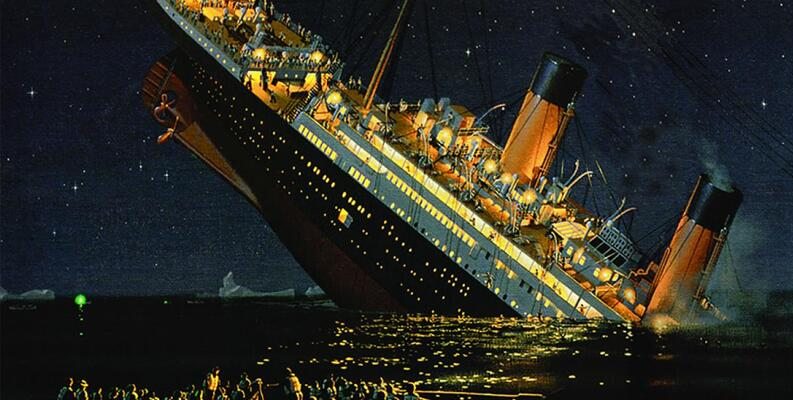

**Objective:**

*   To Understand the Dataset & cleanup.
*   Build a strong classification model to predict whether the passenger survives or not.



**Importing libaries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**loading dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATA SCIENCE INTERNSHIP 2024 CodSoft/Tasks/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Inspecting the dataset**

In [ ]:
df.shape

(891, 12)

In [ ]:
df.ndim

2

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.size

10692

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(891, 12)

**We need to convert the categorical values in the output columns to numerical values we will use the LabelEncoder.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labelfit1=le.fit(df['Cabin'])
df['Cabin']=labelfit1.transform(df['Cabin'])
df['Cabin']

0      147
1       81
2      147
3       55
4      147
      ... 
886    147
887     30
888    147
889     60
890    147
Name: Cabin, Length: 891, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labelfit2=le.fit(df['Ticket'])
df['Ticket']=labelfit2.transform(df['Ticket'])
df['Ticket']

0      523
1      596
2      669
3       49
4      472
      ... 
886    101
887     14
888    675
889      8
890    466
Name: Ticket, Length: 891, dtype: int64

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,523,7.2500,147,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,596,71.2833,81,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,669,7.9250,147,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,49,53.1000,55,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,472,8.0500,147,S


In [ ]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked        True
dtype: bool

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [ ]:
df=df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,523,7.2500,147,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,596,71.2833,81,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,669,7.9250,147,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,49,53.1000,55,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,472,8.0500,147,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,480,29.1250,147,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,101,13.0000,147,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,14,30.0000,30,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,8,30.0000,60,C


In [ ]:
# replacing null values with mode()
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df['Age']=(df['Age'].astype('int64'))
df['Age']

0      22
1      38
2      26
3      35
4      35
       ..
885    39
886    27
887    19
889    26
890    32
Name: Age, Length: 712, dtype: int64

In [ ]:
df['Fare']=(df['Fare'].astype('int64'))
df['Fare']

0       7
1      71
2       7
3      53
4       8
       ..
885    29
886    13
887    30
889    30
890     7
Name: Fare, Length: 712, dtype: int64

In [ ]:
df['Sex']=df['Sex'].replace({'male':1,'female':0})
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
885    0
886    1
887    0
889    1
890    1
Name: Sex, Length: 712, dtype: int64

In [ ]:
df['Embarked']=df['Embarked'].replace({'S':1,'C':2,'Q':3})
df['Embarked']

0      1
1      2
2      1
3      1
4      1
      ..
885    3
886    1
887    1
889    2
890    3
Name: Embarked, Length: 712, dtype: int64

In [ ]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [ ]:
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex             int64
Age             int64
SibSp           int64
Parch           int64
Ticket          int64
Fare            int64
Cabin           int64
Embarked        int64
dtype: object

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,0.636236,29.622191,0.514045,0.432584,336.258427,34.158708,129.067416,1.261236
std,258.683191,0.491139,0.836854,0.481420,14.502891,0.930692,0.854181,203.105352,52.948122,37.163053,0.521561
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,222.750000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,153.750000,8.000000,144.750000,1.000000
50%,445.000000,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,331.500000,15.000000,147.000000,1.000000
75%,677.250000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,531.250000,33.000000,147.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,680.000000,512.000000,147.000000,3.000000


**Observation**



*  The Minimum age of the dataset  is 0 & Maximum is 80.The interquartile range
   20 to 38.
*  The survied field range from 0 to 1.



*   The Fare range from 0 to 512 and the interquartile range from 8 to 33.





In [ ]:
list=['PassengerId','Name','Survived','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
for i in list:
  print(df[i].unique(),i)
  print('--------------------')

[  1   2   3   4   5   7   8   9  10  11  12  13  14  15  16  17  19  21
  22  23  24  25  26  28  31  34  35  36  38  39  40  41  42  44  45  50
  51  52  53  54  55  57  58  59  60  61  63  64  67  68  69  70  71  72
  73  74  75  76  79  80  81  82  84  85  86  87  89  90  91  92  93  94
  95  97  98  99 100 101 103 104 105 106 107 109 111 112 113 114 115 116
 117 118 119 120 121 123 124 125 126 128 130 131 132 133 134 135 136 137
 138 139 140 142 143 144 145 146 147 148 149 150 151 152 153 154 156 157
 158 161 162 163 164 165 166 168 170 171 172 173 174 175 176 178 179 180
 183 184 185 188 189 190 191 192 193 194 195 196 198 200 201 203 204 205
 206 207 208 209 210 211 212 213 214 216 217 218 219 220 221 222 223 225
 226 227 228 229 231 232 233 234 235 237 238 239 240 243 244 245 246 247
 248 249 250 252 253 254 255 256 258 259 260 262 263 264 266 267 268 269
 270 272 273 274 276 277 279 280 281 282 283 284 286 287 288 289 290 291
 292 293 294 295 297 298 300 303 306 308 309 310 31

In [ ]:
list=['PassengerId','Name','Survived','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
for i in list:
  print(df[i].value_counts(),i)
  print('--------------------')

1      1
622    1
595    1
596    1
598    1
      ..
298    1
300    1
303    1
306    1
891    1
Name: PassengerId, Length: 712, dtype: int64 PassengerId
--------------------
Braund, Mr. Owen Harris                            1
Kimball, Mr. Edwin Nelson Jr                       1
Chapman, Mr. John Henry                            1
Van Impe, Mr. Jean Baptiste                        1
Johnson, Mr. Alfred                                1
                                                  ..
Allison, Miss. Helen Loraine                       1
Baxter, Mrs. James (Helene DeLaudeniere Chaput)    1
Johnson, Mr. William Cahoone Jr                    1
Allison, Master. Hudson Trevor                     1
Dooley, Mr. Patrick                                1
Name: Name, Length: 712, dtype: int64 Name
--------------------
0    424
1    288
Name: Survived, dtype: int64 Survived
--------------------
3    355
1    184
2    173
Name: Pclass, dtype: int64 Pclass
--------------------
1    453
0    259

In [ ]:
df.isin(['?']).sum(axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df=df.drop(columns=['PassengerId','Name','Cabin','Ticket'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7,1
1,1,1,0,38,1,0,71,2
2,1,3,0,26,0,0,7,1
3,1,1,0,35,1,0,53,1
4,0,3,1,35,0,0,8,1


**DATA VISUALIZATION**

[]

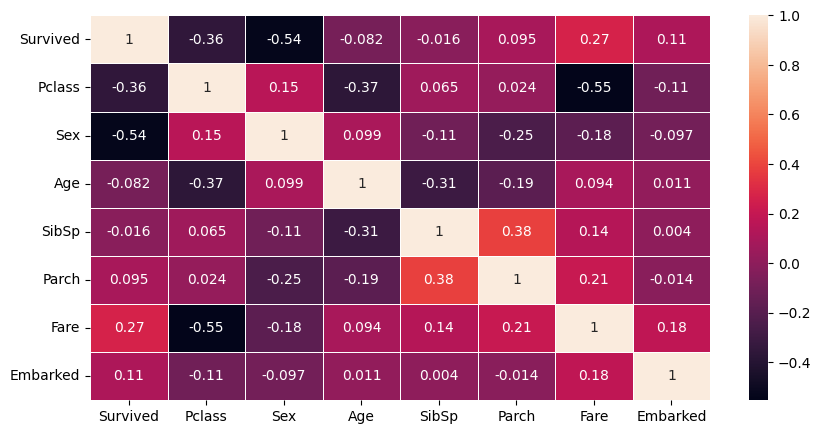

In [ ]:
fig,x=plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,ax=x)
plt.plot()


In [ ]:
# checking correlation of each features with Survived
cor1=df.corr()['Survived']
cor1

Survived    1.000000
Pclass     -0.356462
Sex        -0.536762
Age        -0.082377
SibSp      -0.015523
Parch       0.095265
Fare        0.266275
Embarked    0.108517
Name: Survived, dtype: float64

**Observation**

Here,there is weekest correlation is parch and the highest correlation can be observed survived.

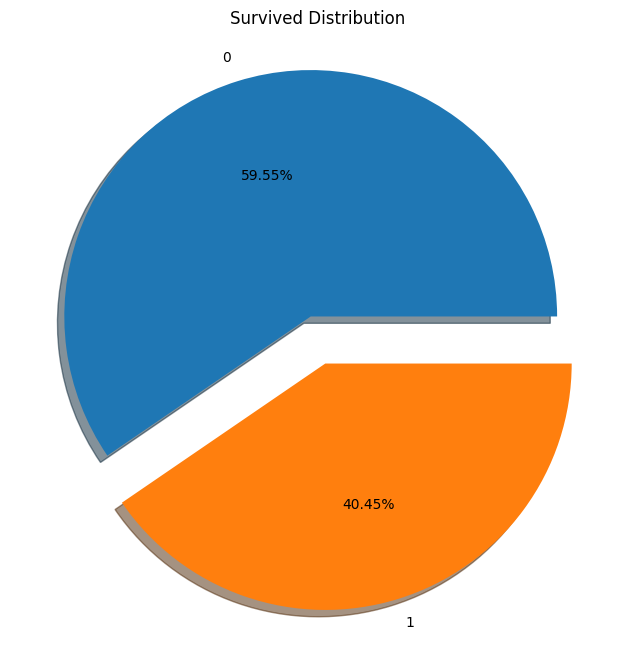

In [ ]:
lb=df['Survived'].value_counts(normalize=True)

plt.figure(figsize=(8,8))
label=df['Survived'].unique()
plt.pie(lb,labels=label,shadow=True,autopct='%1.2f%%',explode=[0.1,0.1])
plt.title('Survived Distribution')
plt.show()

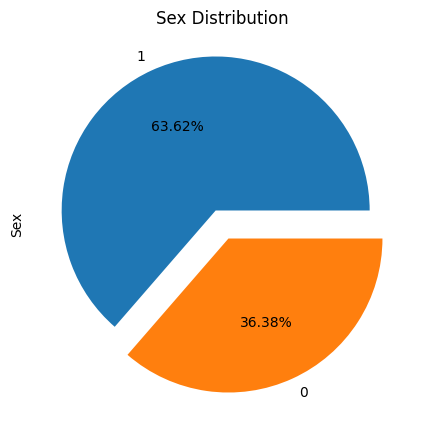

In [ ]:
fig,x=plt.subplots(figsize=(10,5))
df['Sex'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0.1,0.1])
plt.title('Sex Distribution')
plt.show()

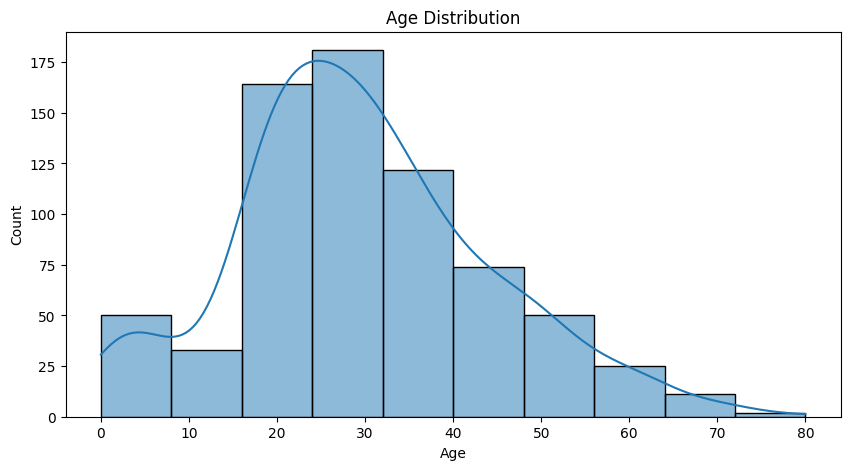

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'],bins=10,kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

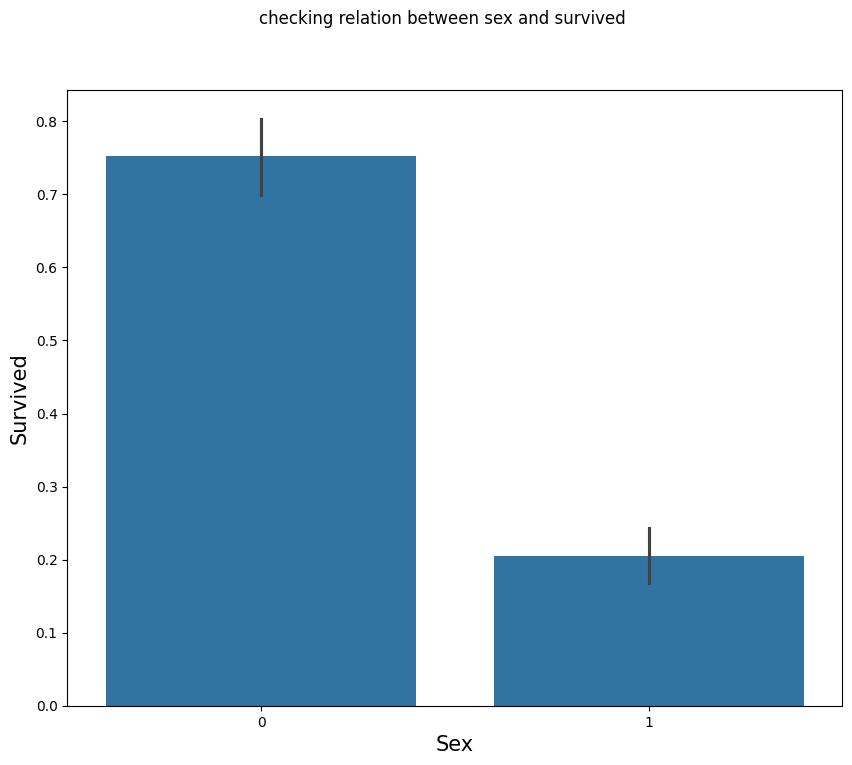

In [ ]:
plt.figure(figsize=(10,8))
plt.suptitle('checking relation between sex and survived')
sns.barplot(data=df,x='Sex',y='Survived')
plt.xlabel('Sex',fontdict={'fontsize':15})
plt.ylabel('Survived',fontdict={'fontsize':15})
plt.show()

[]

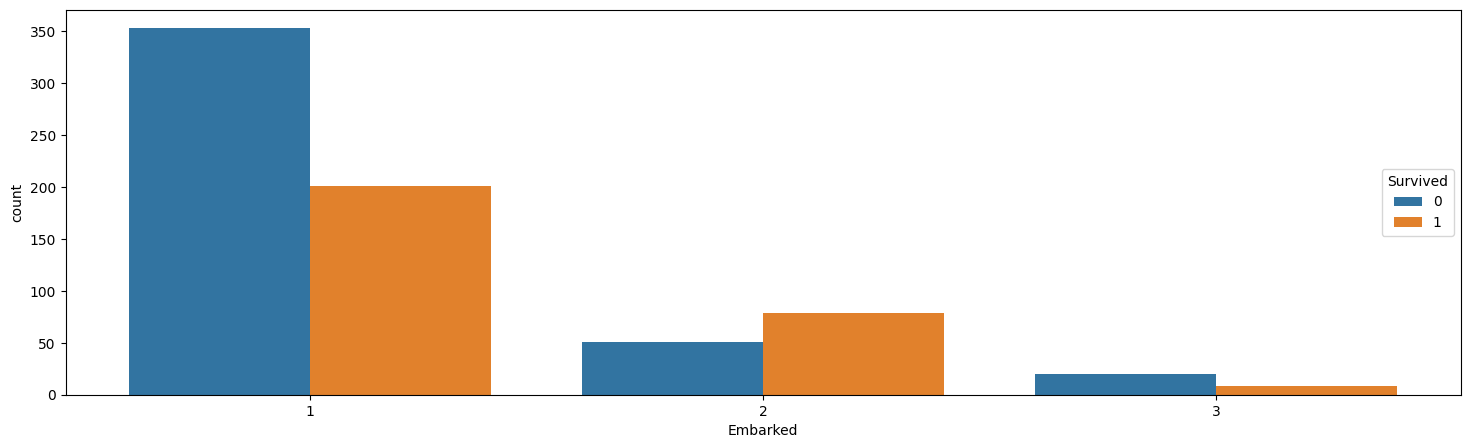

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['Embarked'],hue='Survived',data=df)
plt.legend(loc=5,fancybox=True,title='Survived')
plt.plot()

**Data Preprocessing**

**Splititng the dataset into train and test sets**

In [ ]:
x=df.drop('Survived',axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7,1
1,1,0,38,1,0,71,2
2,3,0,26,0,0,7,1
3,1,0,35,1,0,53,1
4,3,1,35,0,0,8,1
...,...,...,...,...,...,...,...
885,3,0,39,0,5,29,3
886,2,1,27,0,0,13,1
887,1,0,19,0,0,30,1
889,1,1,26,0,0,30,2


In [ ]:
y=df['Survived']

In [ ]:
print(x.shape,y.shape)

(712, 7) (712,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [ ]:
x_train.shape

(534, 7)

In [ ]:
x_test.shape

(178, 7)

**StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

#**MODEL CREATION**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report


**K-Nearest Neighbor(KNN)**

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
pred=knn_model.predict(x_test)
pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

[[82 22]
 [23 51]]


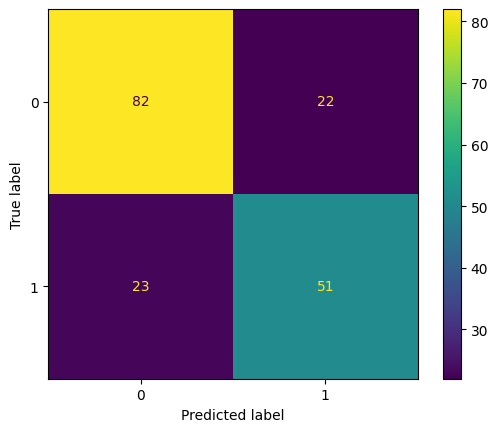

In [ ]:
# confusion_matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
rlt=confusion_matrix(y_test,pred)
print(rlt)
labels=[0,1]
cmd=ConfusionMatrixDisplay(rlt,display_labels=labels)
cmd.plot()

In [ ]:
# Accuracy score and classification report

print('Accuracy:',accuracy_score(y_test,pred)*100,'\n')
print(classification_report(y_test,pred))

Accuracy: 74.71910112359551 

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       104
           1       0.70      0.69      0.69        74

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



In [ ]:
training_score=knn_model.score(x_train,y_train)
training_score

0.8707865168539326

**NaiveBayes:GaussianNB**

In [ ]:
bayes_model=GaussianNB()
bayes_model.fit(x_train,y_train)

GaussianNB()

In [ ]:
pred1=bayes_model.predict(x_test)
pred1

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0])

[[83 21]
 [26 48]]


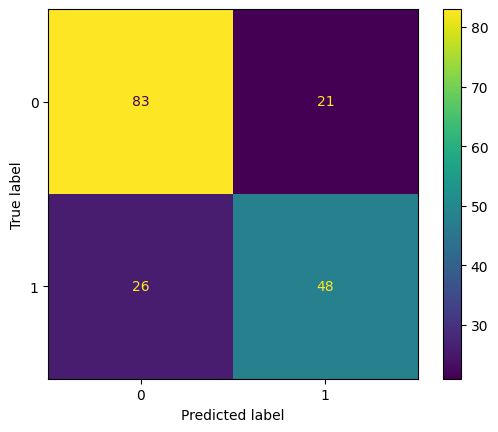

In [ ]:
# confusion_matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
rlt1=confusion_matrix(y_test,pred1)
print(rlt1)
labels=[0,1]
cmd=ConfusionMatrixDisplay(rlt1,display_labels=labels)
cmd.plot()

In [ ]:
# Accuracy score and classification report

print('Accuracy:',accuracy_score(y_test,pred1)*100,'\n')
print(classification_report(y_test,pred1))

Accuracy: 73.59550561797754 

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       104
           1       0.70      0.65      0.67        74

    accuracy                           0.74       178
   macro avg       0.73      0.72      0.73       178
weighted avg       0.73      0.74      0.73       178



In [ ]:
training_score=bayes_model.score(x_train,y_train)
training_score

0.8052434456928839

**RandomForest**

In [ ]:
RF_model=RandomForestClassifier(n_estimators=100,max_depth=5,criterion='gini',max_features=5)
RF_model.fit(x_train,y_train)
pred2=RF_model.predict(x_test)
pred2

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0])

[[93 11]
 [25 49]]


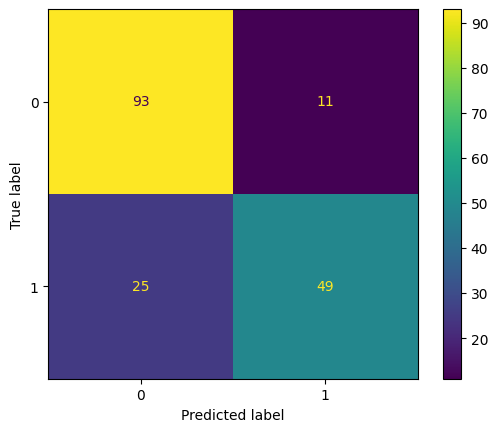

In [ ]:

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
rlt1=confusion_matrix(y_test,pred2)
print(rlt1)
labels=[0,1]
cmd=ConfusionMatrixDisplay(rlt1,display_labels=labels)
cmd.plot()

In [ ]:
# Accuracy score and classification report

print('Accuracy:',accuracy_score(y_test,pred2)*100,'\n')
print(classification_report(y_test,pred2))

Accuracy: 79.7752808988764 

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       104
           1       0.82      0.66      0.73        74

    accuracy                           0.80       178
   macro avg       0.80      0.78      0.78       178
weighted avg       0.80      0.80      0.79       178



In [ ]:
training_score=RF_model.score(x_train,y_train)
training_score

0.8801498127340824

**logistic Regression**

In [ ]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
pred3=lr_model.predict(x_test)
pred3

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0])

[[89 15]
 [24 50]]


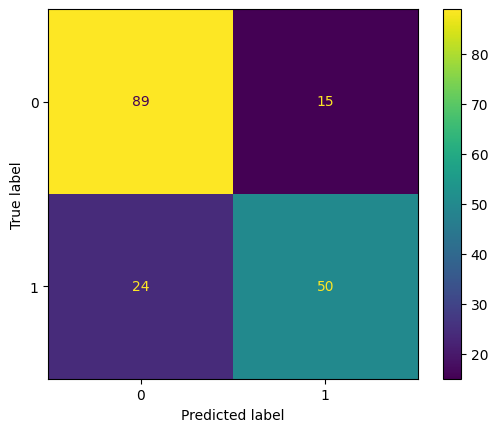

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
rlt2=confusion_matrix(y_test,pred3)
print(rlt2)
labels=[0,1]
cmd=ConfusionMatrixDisplay(rlt2,display_labels=labels)
cmd.plot()

In [ ]:
# Accuracy score and classification report

print('Accuracy:',accuracy_score(y_test,pred3)*100,'\n')
print(classification_report(y_test,pred3))

Accuracy: 78.08988764044943 

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       104
           1       0.77      0.68      0.72        74

    accuracy                           0.78       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [ ]:
training_score=lr_model.score(x_train,y_train)
training_score

0.8127340823970037

Here,we have highest accuracy score in RandomForest which is quite good.so we can predict the data quite accurately.

**PREDICTION**

In [ ]:
RF_model.predict([[3,6,4,2,1,0,9]])

array([0])

**CONCLUSION**





By concluding the preformance evaluation given in the classification report the RandomForest have the highest accuracy .So it makes a best model.